In [8]:
import pandas as pd  

# 读取Excel文件中的所有工作表  
xls = pd.ExcelFile('result_momentum.xlsx')  

# 获取所有工作表的名称  
sheet_names = xls.sheet_names  

# 创建一个新的Excel文件  
new_xls = pd.ExcelWriter('result_momentum_process.xlsx', engine='xlsxwriter') 

# 循环处理每个工作表  
for sheet in sheet_names:  
    # 读取工作表数据  
    df = pd.read_excel(xls, sheet_name=sheet)       

    # 将数据重塑为25行5列的形状，因为你希望得到一个25x5的表格  
    new_df = pd.DataFrame(df.values.reshape(25, 5), columns=None)      

    # 将新的数据写入新的Excel文件中，使用sheet_name作为工作表名称       
    new_df.to_excel(new_xls, sheet_name=sheet, index=False)  

# 保存新的Excel文件  
new_xls.save()


In [16]:
import pandas as pd
import numpy as np

# 读取Excel文件
excel_file = pd.ExcelFile('result_momentum_process.xlsx')

# 存储每个sheet的第五列最大值的列表
max_values = []

# 遍历每个sheet
for sheet_name in excel_file.sheet_names:
    # 读取每个sheet的数据
    df = excel_file.parse(sheet_name)
    
    # 获取第五列的最大值
    max_value = df.iloc[:, 4].max()
    
    # 将最大值添加到列表中
    max_values.append(max_value)

# 将最大值列表reshape成10*10的矩阵
max_matrix = np.array(max_values).reshape(10, 10)

print(max_matrix)


[[95.56 95.54 95.45 95.42 95.72 95.27 95.73 95.29 95.28 95.12]
 [95.56 95.51 95.91 96.98 96.79 97.12 97.86 98.2  98.84 95.62]
 [95.59 95.75 95.85 95.49 96.01 95.81 95.63 95.45 95.72 95.91]
 [95.83 95.69 95.63 95.57 95.75 95.52 95.65 95.88 96.14 95.73]
 [95.54 95.88 96.3  95.77 95.81 96.32 96.6  96.25 95.86 96.54]
 [96.27 96.06 96.03 96.89 96.68 96.54 97.1  97.01 96.9  96.97]
 [96.59 96.6  96.82 96.42 97.41 97.28 83.22 79.85 78.99 82.97]
 [81.53 82.9  82.11 97.73 85.76 85.55 85.49 85.13 83.77 82.84]
 [84.72 82.76 98.3  85.68 85.56 84.89 86.54 85.76 84.47 84.54]
 [86.78 98.73 87.72 87.94 85.13 87.3  85.62 87.62 87.12 84.85]]


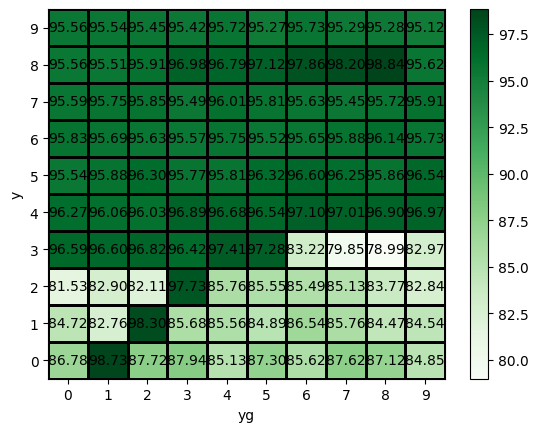

In [39]:
import matplotlib.pyplot as plt
import numpy as np

data = max_matrix  # 10x10 的二维数据

# 翻转矩阵按行
flipped_data = np.flipud(data)

# 画块状的热力图
plt.pcolormesh(flipped_data, cmap='Greens', edgecolors='k', linewidth=1, vmin=np.min(data), vmax=np.max(data))
plt.colorbar()  # 添加颜色条

# 设置坐标轴的刻度
plt.xticks(np.arange(0.5, 10.5), range(10))
plt.yticks(np.arange(0.5, 10.5), range(10))

# 添加刻度标签
plt.xlabel('yg')
plt.ylabel('y')



for i in range(10):
    for j in range(10):
        plt.text(j + 0.5, i + 0.5, f'{flipped_data[i, j]:.2f}', ha='center', va='center', color='black')

# 设置图表标题
plt.title('')

# 显示图表
plt.show()


In [7]:
import pandas as pd
import numpy as np

# 读取Excel文件
excel_file = pd.ExcelFile('result_all.xlsx')

# 存储每个sheet的第五列最大值的列表
max_values = []

# 遍历每个sheet
for sheet_name in excel_file.sheet_names:
    # 读取每个sheet的数据
    df = excel_file.parse(sheet_name)
    
    # 获取第五列的最大值
    max_value = df.iloc[:, 4].max()
    
    # 将最大值添加到列表中
    max_values.append(max_value)

# 将最大值列表reshape成的矩阵
max_matrix = np.array(max_values).reshape(5, 4)
print(' linear, log, cnn, vgg16')
print(max_matrix)
#fastslowmon
#mon
#slowmon
#fednag
#fedavg
'''
              linear, log, cnn, vgg16
fastslowmon  [[85.05 88.59 96.77 83.6 ]
mon          [84.48 87.83 96.49 82.36]
slowmon      [84.42 87.83 95.72 82.27]
fednag       [84.61 87.77 96.23 81.79]
fedavg       [82.41 86.46 94.85 77.1 ]]
'''

 linear, log, cnn, vgg16
[[85.05 88.59 96.77 83.6 ]
 [84.48 87.83 96.49 82.36]
 [84.42 87.83 95.72 82.27]
 [84.61 87.77 96.23 81.79]
 [82.41 86.46 94.85 77.1 ]]
